# K-nearest neighbours code


The K-nearest neighbours algrorithm is often used as a baseline method as it is simple to understand. 
The method considers one nearest neighbour: it does this by finding the closest training data point to the prediction point. The prediction is then simply the known output for that data point. When considering more than one neighbour a voting system is used to assign a label. For more than one class we can count how many neighbours belong to each class and predict the most common 



In [1]:
#import relevant modules 
#import relevant libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [40]:
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sn

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [4]:
#read in the dataset 
dataset = pd.read_csv('framingham.csv')

In [5]:
dataset.head(10) #checking correct dataset is imported 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Use premade functions to optimise parameters before entry 

In [6]:
import preprocessing_ml as pp

Importing the preprocessing module for the Exeter NatSci Machine Learning Group.....
Successfully imported the preprocessing module


# Create function for K-neighbors classifier, using functions for optimisation 

In [18]:

def k_neighbors(X_train, X_test, y_train, y_test, v=0,  n_neighbors= 16):
    '''Do k_neighbors  fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    - n_neighbors = i, i=int: define number of neighbors 
    '''
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    from sklearn.model_selection import cross_val_score
    
    print('\nCalculating k neighbors...\n')
    
    KN = KNeighborsClassifier(n_neighbors)
    KN.fit(X_train, y_train) 
   
    
   
    if v == 1: 
        print('\nRunning K-neighbors algorithm')
    
    
    return KN
    

In [20]:
# Finally use all the functions I made to preprocess dataset:
features = dataset.columns #try all columns

dataset_t = pp.chose_features(dataset, n_features=15) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
KN = k_neighbors(X_train, X_test, y_train, y_test, v=1, n_neighbors =16)
y_pred = KN.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)    #for 16 k neighbors 


print('Accuracy {:.2f}%: '.format(accuracy*100))



Calculating k neighbors...


Running K-neighbors algorithm
Accuracy 83.06%: 


# Changing parameters - measuring effect of k 

In [21]:

features = dataset.columns #try all columns

dataset_t = pp.chose_features(dataset, n_features=15) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset


#here I first created a empty dataframe acc, to then fill with accuracy scores for ranging the value of 
#k for comparison 
acc=[]
for i in range (1,100 ):
    KN = k_neighbors(X_train, X_test, y_train, y_test, v=1, n_neighbors =i)
    y_pred = KN.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)    



    acc.append(accuracy*100)

print(acc)
    



Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-

<Figure size 864x432 with 0 Axes>

Text(0.5,1,'Varying neighbor values and the effect on accuracy')

Text(0.5,0,'Number of neighbors, value of k')

Text(0,0.5,'Accuracy %')

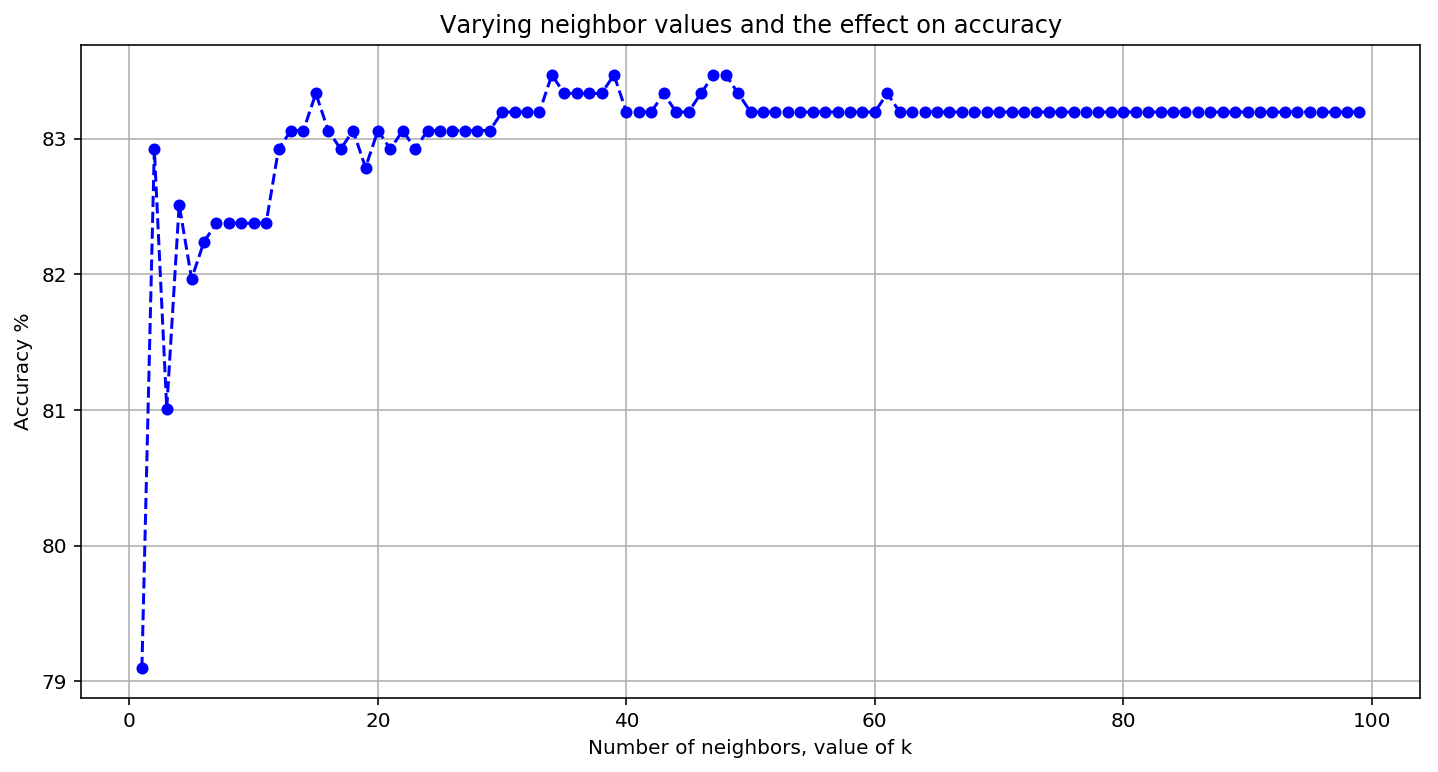

In [22]:
#plot the change of k and how this effects accuracy 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), acc, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.grid()
plt.title('Varying neighbor values and the effect on accuracy')
plt.xlabel('Number of neighbors, value of k')
plt.ylabel('Accuracy %')


value of k =16 appears to give high accuracy 

# Measuring effect of utilising different number of features from n =15 to n =3 


In [23]:
#using k = 16 for comparison 
features = dataset.columns #try all columns
acc=[]
for i in range (3, 16 ):
    
    dataset_t = pp.chose_features(dataset, n_features=i) # choose n features
    dataset_t = pp.drop_missing(dataset_t) # drop missing rows
    X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
    KN = k_neighbors(X_train, X_test, y_train, y_test, v=1, n_neighbors =16)
    y_pred = KN.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    #for 16 k neighbors  
    acc.append(accuracy*100)
print(acc)




Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm

Calculating k neighbors...


Running K-neighbors algorithm
[83.138780804150457, 84.395318595578672, 81.806282722513089, 82.329842931937165, 82.329842931937165, 82.329842931937165, 84.615384615384613, 84.615384615384613, 84.820239680426099, 84.820239680426099, 83.469945355191257,

<Figure size 864x432 with 0 Axes>

Text(0.5,1,'Changing feature size and it the affect on accuracy')

Text(0.5,0,'Feature numbers')

Text(0,0.5,'Accuracy %')

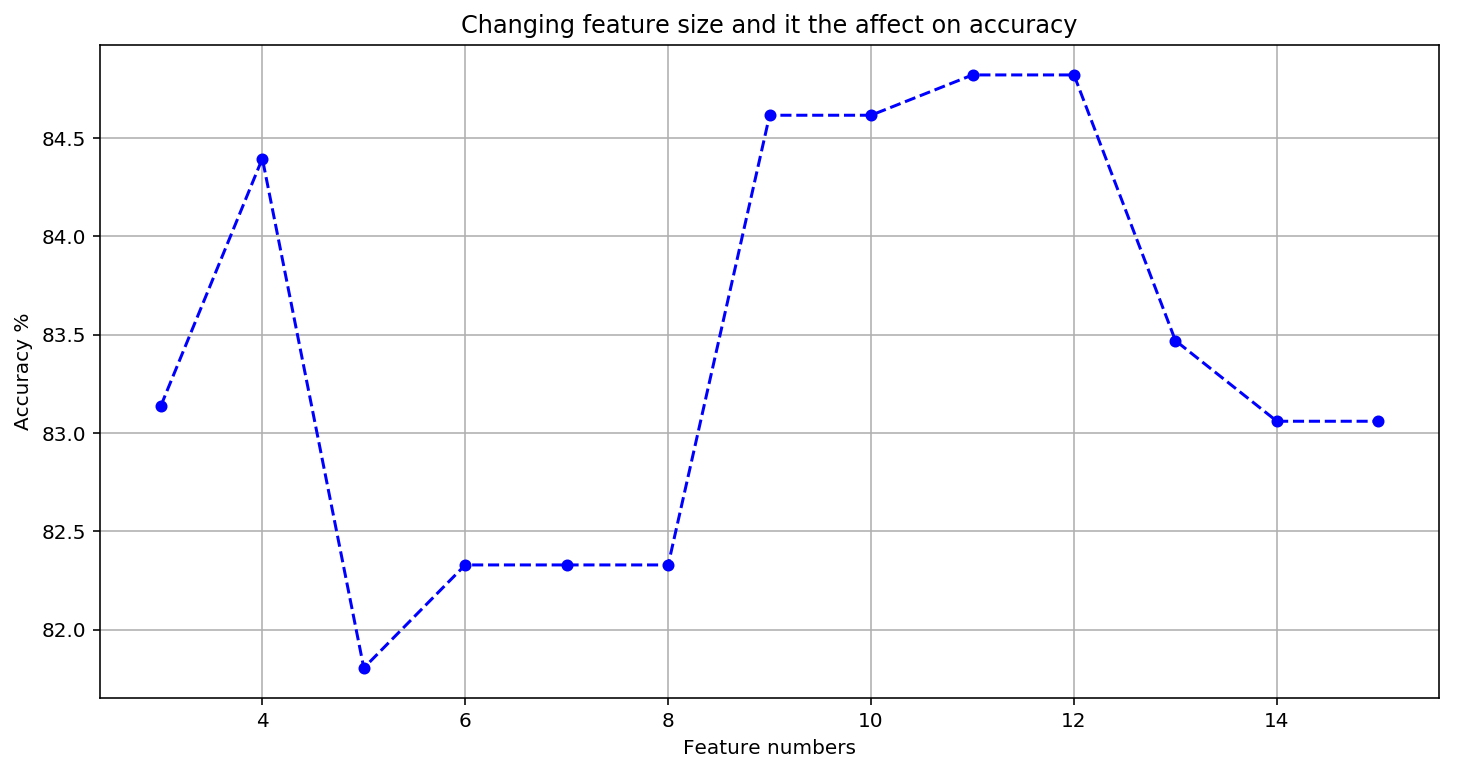

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(range(3,16), acc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.grid()
plt.title('Changing feature size and it the affect on accuracy')
plt.xlabel('Feature numbers')
plt.ylabel('Accuracy %')

# Comparison between scaled and unscaled data, using optimal conditions for other parameters 

Using K=16 neighbors and the top 12 features, comparison between accuracy of scaled and unscaled data 

In [27]:
dataset_s = pp.chose_features(dataset, n_features=12) # choose n features
dataset_s = pp.drop_missing(dataset_s) # drop missing rows
dataset_s = pp.scale_data(dataset_s, 'minmax', v=1 ) #scale data using minmax function 
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
KN = k_neighbors(X_train, X_test, y_train, y_test, v=1, n_neighbors =16)
y_pred = KN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)    #for 16 k neighbors 

print('Accuracy {:.2f}%: '.format(accuracy*100))


Scaling data....
	 * Using minmax scaling

Calculating k neighbors...


Running K-neighbors algorithm
Accuracy 83.06%: 


In [29]:
dataset_s = pp.chose_features(dataset, n_features=12) # choose n features
dataset_s = pp.drop_missing(dataset_s) # drop missing rows
dataset_s = pp.scale_data(dataset_s, 'standard', v=1 ) #scale data using minmax function 
X_train, X_test, y_train, y_test = pp.split_data(dataset_s) # split dataset
KN = k_neighbors(X_train, X_test, y_train, y_test, v=1, n_neighbors =16)
y_pred = KN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)    #for 16 k neighbors 
print('Accuracy {:.2f}%: '.format(accuracy*100))

Scaling data....
	 * Using standard scaling

Calculating k neighbors...


Running K-neighbors algorithm
Accuracy 84.69%: 


In [47]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
KN = k_neighbors(X_train, X_test, y_train, y_test, v=1, n_neighbors =16)
y_pred = KN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)    #for 16 k neighbors 
print('Accuracy {:.2f}%: '.format(accuracy*100))

print(accuracy*100)
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(classification_report(y_test,y_pred))




Calculating k neighbors...


Running K-neighbors algorithm
Accuracy 84.82%: 
84.8202396804
             precision    recall  f1-score   support

          0       0.85      0.99      0.92       637
          1       0.50      0.04      0.07       114

avg / total       0.80      0.85      0.79       751



Analysis suggest that for this model, feature number of 12, with 16 neighbors on unscaled data results in the highest accruacy model with a cross validation score of 85%, and final accuracy score of 84.82%

# Resampling data using optimal conditions

In [46]:
dataset_up = pp.chose_features(dataset, n_features=12) # choose n features
dataset_up = pp.drop_missing(dataset_up) # drop missing rows
datset_up = pp.upsample(dataset_up)
dataset_up = pp.scale_data(dataset_up, 'standard', v=1 ) #scale data using minmax function 
X_train, X_test, y_train, y_test = pp.split_data(dataset_up) # split dataset
KN = k_neighbors(X_train, X_test, y_train, y_test, v=1, n_neighbors =16)
y_pred = KN.predict(X_test)
accuracy_upsampled = accuracy_score(y_test, y_pred)    #for 16 k neighbors 
print('Accuracy {:.2f}%: '.format(accuracy*100))

print(accuracy_upsampled*100)
cm=confusion_matrix(y_test,y_pred)
conf_matrix_upsampled= pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(classification_report(y_test,y_pred))

print('\nClassification report on training data ')
print(classification_report(y_test,y_pred))

Scaling data....
	 * Using standard scaling

Calculating k neighbors...


Running K-neighbors algorithm
Accuracy 84.82%: 
84.6870838881
             precision    recall  f1-score   support

          0       0.85      0.99      0.92       637
          1       0.44      0.04      0.07       114

avg / total       0.79      0.85      0.79       751



In [42]:
dataset_dn = pp.chose_features(dataset, n_features=12) # choose n features
dataset_dn = pp.drop_missing(dataset_dn) # drop missing rows
datset_dn = pp.downsample(dataset_dn)
dataset_dn = pp.scale_data(dataset_dn, 'standard', v=1 ) #scale data using minmax function 
X_train, X_test, y_train, y_test = pp.split_data(dataset_dn) # split dataset
KN = k_neighbors(X_train, X_test, y_train, y_test, v=1, n_neighbors =16)

y_pred = KN.predict(X_test)
accuracy_downsampled = accuracy_score(y_test, y_pred)    #for 16 k neighbors 
print('Accuracy {:.2f}%: '.format(accuracy*100))

print(accuracy_downsampled*100)
cm=confusion_matrix(y_test,y_pred)
conf_matrix_downsampled=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(classification_report(y_test,y_pred))


Scaling data....
	 * Using standard scaling

Calculating k neighbors...


Running K-neighbors algorithm
Accuracy 84.69%: 
84.6870838881
             precision    recall  f1-score   support

          0       0.85      0.99      0.92       637
          1       0.44      0.04      0.07       114

avg / total       0.79      0.85      0.79       751



<Figure size 1440x864 with 0 Axes>

Text(0.5,1,'Upsampled data ')

Text(0.5,1,'Downsampled data ')

Text(0.5,1,'Unsampled data ')

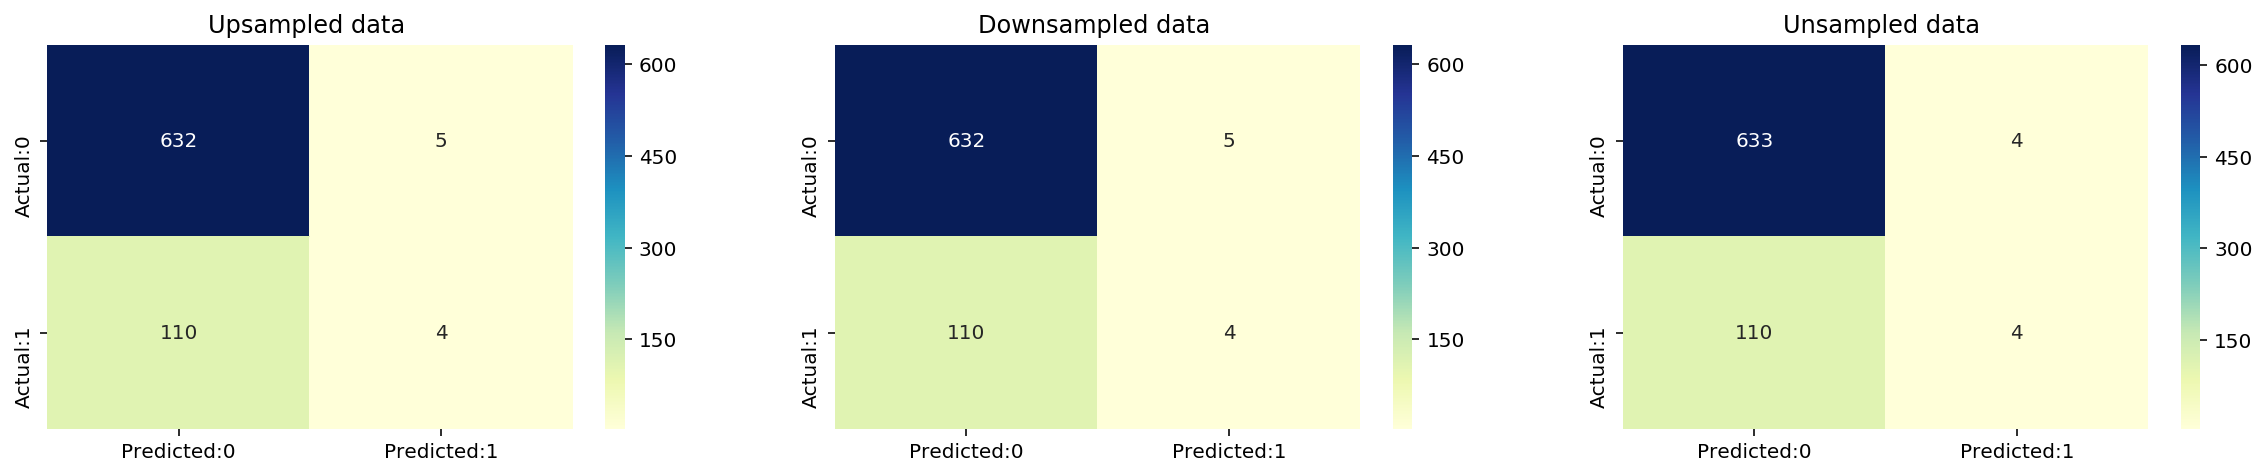

In [48]:
plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
sn.heatmap(conf_matrix_upsampled, annot=True,fmt='d',cmap="YlGnBu")
plt.title('Upsampled data ')

plt.subplot(3,3,2)
sn.heatmap(conf_matrix_downsampled, annot=True,fmt='d',cmap="YlGnBu")
plt.title('Downsampled data ')

plt.subplot(3,3,3)
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title('Unsampled data ')

# Metric effects on training data - overfitting or not?

In [49]:
def cross_val(model, X, Y, scoring = ['accuracy','precision','recall','f1'], cv=5):
    
   #See https://scikit-learn.org/stable/modules/model_evaluation.html for list of allowed scoring params 
    from sklearn.model_selection import cross_val_score 
    
    print('\nCrossvalidation score for {} splits:\n'.format(cv))   
    
    cv_results = pd.DataFrame(columns=scoring)
    for measure in scoring:
        cv_results[measure] = cross_val_score(model, X, Y, scoring = measure, cv=cv)
    
    #print("Cross validation Accuracy:\n", cv_results.mean(),"\nCross validation STDEV:\n" , cv_results.std())
    return cv_results.mean()

def performance(model,X_test,y_test,cutoff=0.5,v=0,output='Accuracy'):
    from sklearn.preprocessing import binarize
    from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

    if model == 'fram': # cheap and dirty fix for framingham data needing different processing
        y_pred = X_test > cutoff*100 
    else:
        y_pred = model.predict_proba(X_test)
        y_pred = binarize(y_pred,cutoff)[:,1]
    
    if v == 1: 
        print('\n========\nCuttoff: ',cutoff)
        print('Confusion Matrix:')
        cm=confusion_matrix(y_test,y_pred)
        conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        print(confusion_matrix(y_test,y_pred))
    
        print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))
        print('f1 score: {:.2f}%'.format(f1_score(y_test,y_pred)*100))
        print('precision score: {:.2f}%'.format(precision_score(y_test,y_pred)*100))
        print('recall score: {:.2f}%'.format(recall_score(y_test,y_pred)*100))
        
        print(classification_report(y_test,y_pred))
    

    if output == 'Accuracy':
         return accuracy_score(y_test,y_pred)
    elif output == 'Precision':
         return precision_score(y_test,y_pred)
    elif output == 'Recall':
         return recall_score(y_test,y_pred)
    elif output == 'f1_score':
         return f1_score(y_test,y_pred)
    elif output == 'All':
        a = [accuracy_score(y_test,y_pred), precision_score(y_test,y_pred),
                      recall_score(y_test,y_pred), f1_score(y_test,y_pred)]
        return a



    
# measure = cross_val(k_neighbors(X_train, X_test, y_train, y_test), X_train, y_train,scoring=['accuracy'])

# measure
#where model_name is replaced by whatever you have defined the model fit as 
#For example in the K-neighbors section I have defined the model_name as KN. (see k_neighbors function)


/Users/eleanorbarr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/eleanorbarr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 864x432 with 0 Axes>

accuracy max= 0.848202396804


precision max= 0.5


recall max= 0.868421052632


f1 max= 0.320610687023


Text(0.5,1,"Changing cutoff to see effect on metrics for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n           metric_params=None, n_jobs=1, n_neighbors=16, p=2,\n           weights='uniform')")

Text(0.5,0,'Cutoff')

Text(0,0.5,'Score')

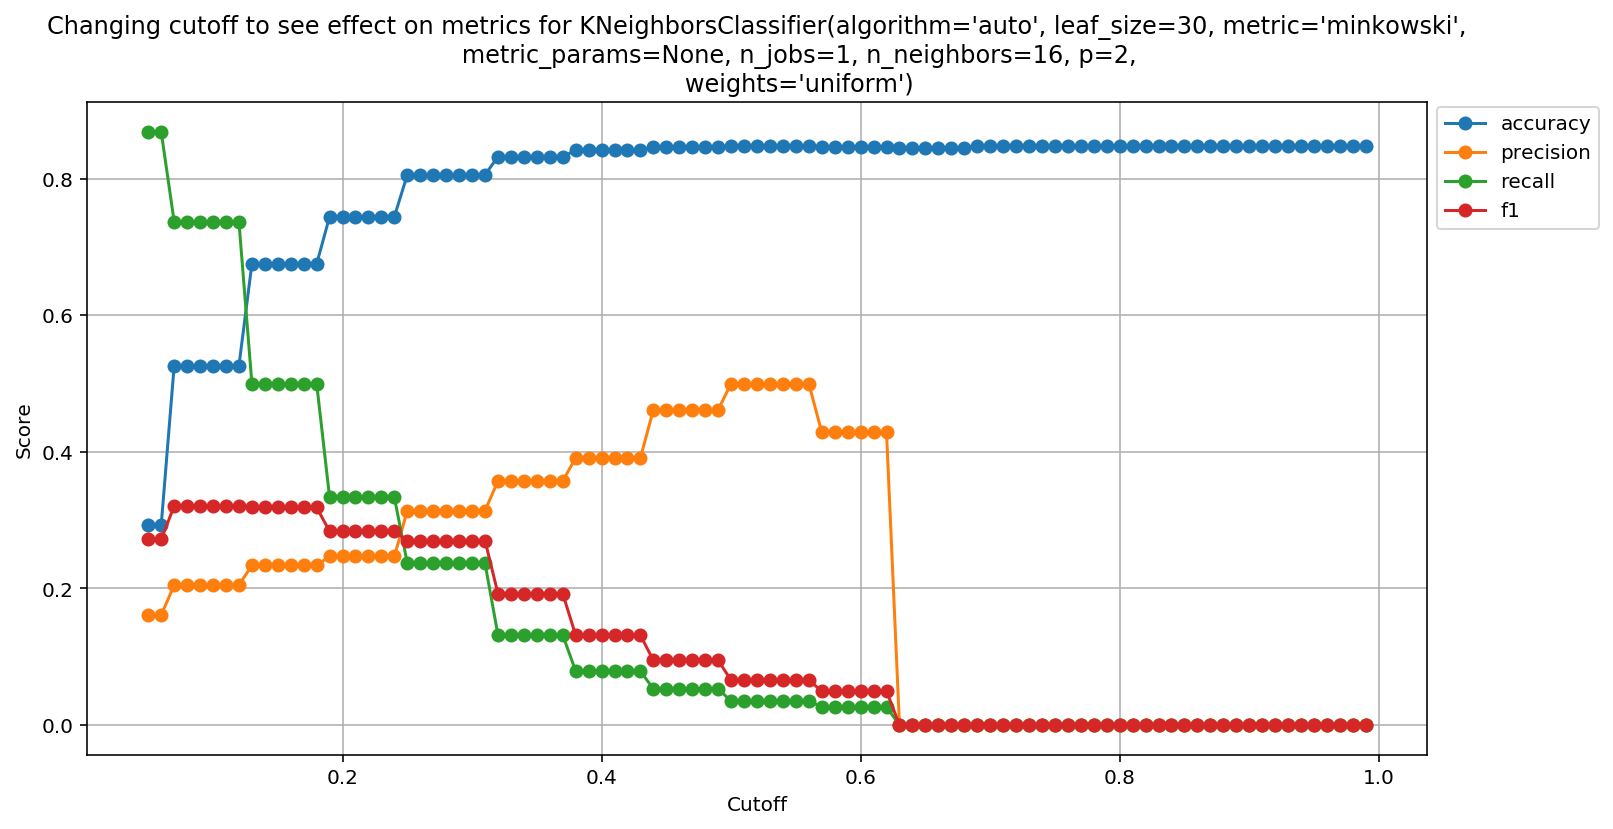

In [50]:
results = []
range_x = np.arange(0.05, 1, 0.01)
algor = KN

for cutoff in range_x:
    results.append(performance(algor,X_test,y_test,cutoff=cutoff,output='All'))

results = pd.DataFrame(results,columns=['accuracy','precision','recall','f1'])
#print(results)

plt.figure(figsize=(12, 6))
for al in results.columns:
    plt.plot(range_x, results[al],label=al,marker='o')
    print(al, "max=", max(results[al]))
plt.grid()
plt.title('Changing cutoff to see effect on metrics for {}'.format(str(algor)))
plt.xlabel('Cutoff')
plt.ylabel('Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))

In [82]:
#create plot for ranging values of k and the effect on test and train data 

from sklearn.model_selection import validation_curve
KN = KNeighborsClassifier()

kn_range = (0,100)
train_scores, test_scores = validation_curve(KN(), param_name='n_neighbors', param_range=kn_range)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with KN")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

plt.show()

TypeError: 'KNeighborsClassifier' object is not callable

In [79]:
KN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')